In [82]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

In [7]:
flip_df =  pd.read_csv('reviews.csv')

# Exploratory Data Analysis

In [8]:
flip_df.head()

,Item,Price,Rating,Review
0,Avita Pura Ryzen 5 Quad Core 3500U - (8 GB/512...,32990,4,'Good choice' Here's the detail review.First l...
1,Avita Pura Ryzen 5 Quad Core 3500U - (8 GB/512...,32990,3,'Good' Specs are good but it has some poor com...
2,Avita Pura Ryzen 5 Quad Core 3500U - (8 GB/512...,32990,3,'Good' I wanted to buy a good configuration pr...
3,Avita Pura Ryzen 5 Quad Core 3500U - (8 GB/512...,32990,5,'Just wow!' VALUE FOR MONEY PRODUCTThis laptop...
4,Avita Pura Ryzen 5 Quad Core 3500U - (8 GB/512...,32990,5,'Classy product' 1.Performance - Talking about...


In [9]:
flip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11102 entries, 0 to 11101
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Item    11102 non-null  object
 1   Price   11102 non-null  int64 
 2   Rating  11102 non-null  int64 
 3   Review  11102 non-null  object
dtypes: int64(2), object(2)
memory usage: 347.1+ KB


In [10]:
flip_df.shape

(11102, 4)

In [11]:
flip_df.dtypes

Item      object
Price      int64
Rating     int64
Review    object
dtype: object

In [12]:
flip_df.describe()

,Price,Rating
count,11102.000000,11102.000000
mean,32624.875608,4.662223
std,24484.392792,0.592064
min,1699.000000,3.000000
25%,11999.000000,4.000000
50%,32990.000000,5.000000
75%,69990.000000,5.000000
max,69990.000000,5.000000


In [14]:
flip_df.isna().sum()

Item      0
Price     0
Rating    0
Review    0
dtype: int64

In [13]:
comment_words = ''
stopwords = set(STOPWORDS)

In [15]:
for val in flip_df['Review']: 
            val = str(val) 
            # split the value 
            tokens = val.split() 
        # Converts each token into lowercase 
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower() 
                comment_words += " ".join(tokens)+" "

In [16]:
wordcloud = WordCloud(width = 1000, height = 1000,max_words= 100,
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words)

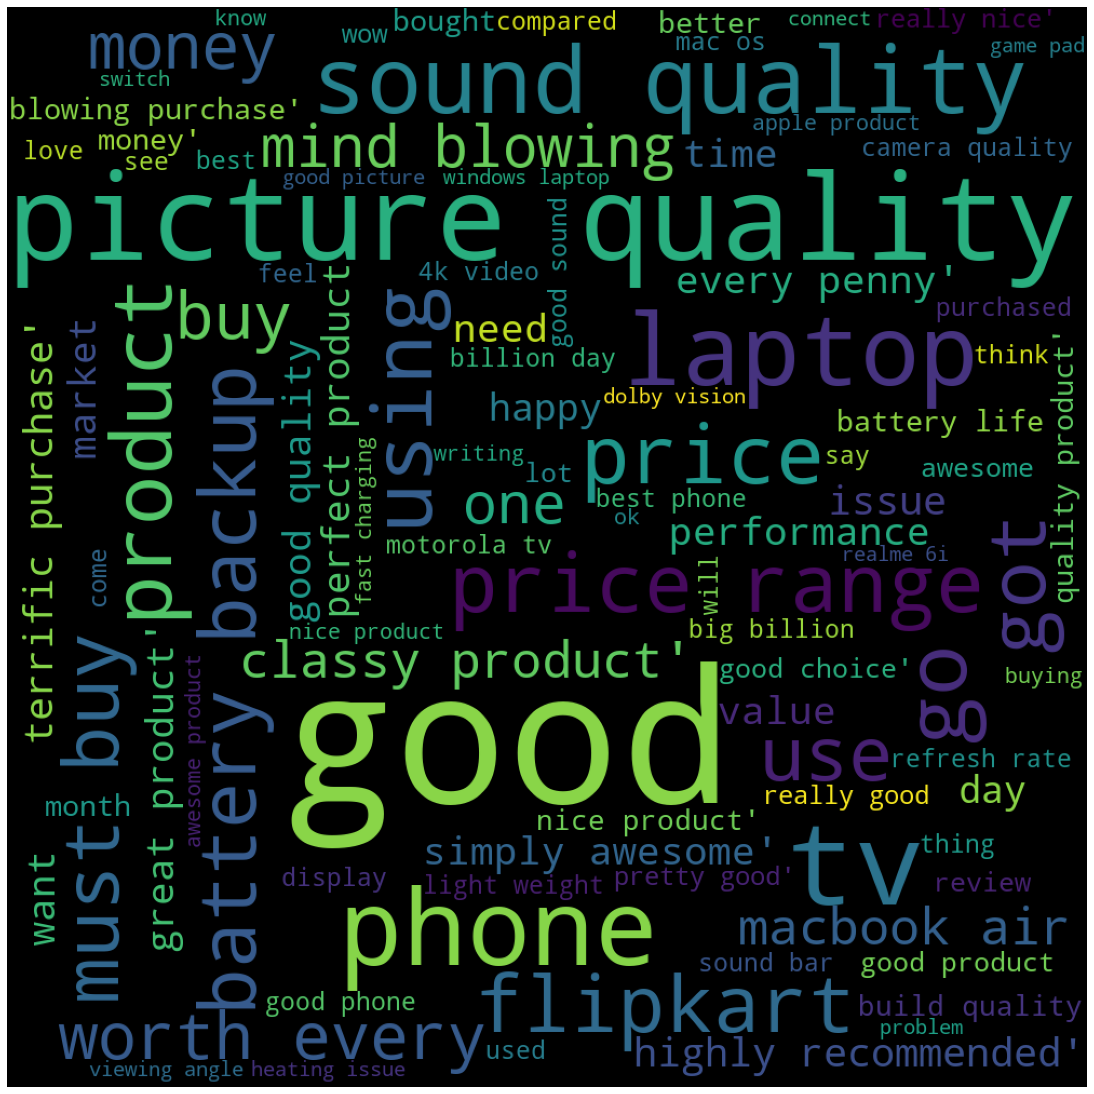

In [19]:
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.tight_layout(pad = 0)

Text(0.5, 0, 'Rating')

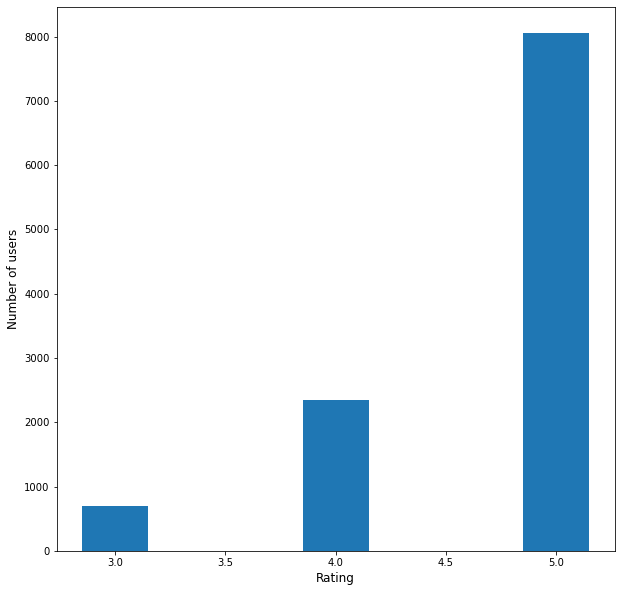

In [22]:
rates = flip_df['Rating'].value_counts()
plt.figure(figsize=(10,10))
plt.bar(rates.index,rates.values,width = 0.3)
plt.ylabel('Number of users', fontsize=12)
plt.xlabel('Rating', fontsize=12)

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
review_df = flip_df[['Rating', 'Review']]
review_df

,Rating,Review
0,4,'Good choice' Here's the detail review.First l...
1,3,'Good' Specs are good but it has some poor com...
2,3,'Good' I wanted to buy a good configuration pr...
3,5,'Just wow!' VALUE FOR MONEY PRODUCTThis laptop...
4,5,'Classy product' 1.Performance - Talking about...
...,...,...
11097,4,'Good product but' Worst delivery no proper re...
11098,4,'Pretty good' Good product runs fine. Didn't ...
11099,5,'Super!' Lucky toh have t
11100,5,'Highly recommended' Thanks big bil


# Tokenization

In [56]:
Review = review_df.Review
Review.head(10)

0    'Good choice' Here's the detail review.First l...
1    'Good' Specs are good but it has some poor com...
2    'Good' I wanted to buy a good configuration pr...
3    'Just wow!' VALUE FOR MONEY PRODUCTThis laptop...
4    'Classy product' 1.Performance - Talking about...
5    'Worth every penny' Best of the lot in this pr...
6    'Delightful' This is a very good choice for a ...
7    'Fabulous!' Great product with Ryzen 5 and Veg...
8    'Good quality product' It is the best budget l...
9    'Simply awesome' I was a little skeptical afte...
Name: Review, dtype: object

In [57]:
tk = RegexpTokenizer(r'[a-zA-Z0-9\']+') 
Review = Review.apply(lambda x: tk.tokenize(x)).apply(lambda x: ' '.join(x))

In [58]:
Review.head(10)

0    'Good choice' Here's the detail review First l...
1    'Good' Specs are good but it has some poor com...
2    'Good' I wanted to buy a good configuration pr...
3    'Just wow ' VALUE FOR MONEY PRODUCTThis laptop...
4    'Classy product' 1 Performance Talking about P...
5    'Worth every penny' Best of the lot in this pr...
6    'Delightful' This is a very good choice for a ...
7    'Fabulous ' Great product with Ryzen 5 and Veg...
8    'Good quality product' It is the best budget l...
9    'Simply awesome' I was a little skeptical afte...
Name: Review, dtype: object

In [33]:
def remove_punctuation(char):
    clean_list = [i for i in char if i not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [59]:
Review = Review.apply(remove_punctuation)
Review.head(10)

0    Good choice Heres the detail review First lets...
1    Good Specs are good but it has some poor compo...
2    Good I wanted to buy a good configuration prod...
3    Just wow  VALUE FOR MONEY PRODUCTThis laptop i...
4    Classy product 1 Performance Talking about Per...
5    Worth every penny Best of the lot in this pric...
6    Delightful This is a very good choice for a li...
7    Fabulous  Great product with Ryzen 5 and Vega ...
8    Good quality product It is the best budget lap...
9    Simply awesome I was a little skeptical after ...
Name: Review, dtype: object

# Remove Stop Words

In [39]:
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
#change the words into lower case
Review= Review.apply(lambda x: [i.lower() for i in word_tokenize(x) if i.lower() not in stop]).apply(lambda x: ' '.join(x))

In [61]:
Review

0        good choice heres detail review first lets tal...
1        good specs good poor component hardly see buyi...
2        good wanted buy good configuration product ini...
3        wow value money productthis laptop overall goo...
4        classy product 1 performance talking performan...
                               ...                        
11097    good product worst delivery proper response de...
11098    pretty good good product runs fine didnt recei...
11099                                      super lucky toh
11100                    highly recommended thanks big bil
11101              useless product recieved macbook faulty
Name: Review, Length: 11102, dtype: object

# Stemming

In [65]:
stemmer = SnowballStemmer('english') 
Review = Review.apply(lambda x: [stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))

In [66]:
Review

0        good choic here detail review first let talk l...
1        good spec good poor compon hard see buy laptop...
2        good want buy good configur product initi sele...
3        wow valu money productthi laptop overal good p...
4        classi product 1 perform talk perform machin b...
                               ...                        
11097    good product worst deliveri proper respons del...
11098    pretti good good product run fine didnt receiv...
11099                                      super lucki toh
11100                         high recommend thank big bil
11101                useless product reciev macbook faulti
Name: Review, Length: 11102, dtype: object

# TFIDF Vectorization

In [62]:
vec = TfidfVectorizer(stop_words = stop)
data_vec = vec.fit_transform(Review)

In [63]:
data_vec

<11102x8395 sparse matrix of type '<class 'numpy.float64'>'
	with 100257 stored elements in Compressed Sparse Row format>

In [64]:
data_vec.shape

(11102, 8395)

# Building ML Models

## Splitting train & test data

In [67]:
y = review_df['Rating']
y = y.values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(data_vec, y, test_size = 0.2, stratify = y,random_state=42)

## Imbalance handling in the target variable

In [70]:
review_df['Rating'].value_counts()

5    8056
4    2342
3     704
Name: Rating, dtype: int64

In [74]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train, y_train)

## Logistic Regression

In [80]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_res, y_res)
y_pred = log_reg.predict(X_test)

In [86]:
f1_log = f1_score(y_test, y_pred, average = 'weighted')
f1_log

0.8999309060343217

In [88]:
y_pred

array([4, 4, 5, ..., 5, 5, 5])

In [89]:
y_test

array([4, 4, 5, ..., 5, 5, 5])

## Random Forest Classifier

In [96]:
RF_reg = RandomForestClassifier()
RF_reg.fit(X_res, y_res)
y_pred2 = RF_reg.predict(X_test)

In [97]:
f1_RF = f1_score(y_test, y_pred2, average = 'weighted')
f1_RF

0.9173014905741762

In [99]:
y_pred2

array([4, 4, 5, ..., 5, 5, 5])

In [100]:
y_test

array([4, 4, 5, ..., 5, 5, 5])

## XGB Classifier

In [101]:
xgb_cl = XGBClassifier()
xgb_cl.fit(X_res, y_res)
y_pred3 = xgb_cl.predict(X_test)

In [103]:
f1_xgb = f1_score(y_test, y_pred3, average = 'weighted')
f1_xgb

0.9253226263483395

In [104]:
y_pred3

array([4, 4, 5, ..., 5, 5, 5])

In [105]:
y_test

array([4, 4, 5, ..., 5, 5, 5])

## Support Vector Classifier

In [107]:
sv_cl = SVC()
sv_cl.fit(X_res,y_res)
y_pred4 = sv_cl.predict(X_test)

In [109]:
f1_sv =f1_score(y_test, y_pred4, average = 'weighted')
f1_sv

0.8998206359051825

In [110]:
y_pred4

array([4, 5, 5, ..., 5, 5, 5])

In [111]:
y_test

array([4, 4, 5, ..., 5, 5, 5])

## K-Nearest Neighbor

In [114]:
kn_cl = KNeighborsClassifier(n_neighbors=3)
kn_cl.fit(X_train,y_train)
y_pred5 = kn_cl.predict(X_test)

In [116]:
f1_knn = f1_score(y_test, y_pred5, average = 'weighted')
f1_knn

0.8364344941297113

In [117]:
y_pred5

array([5, 5, 5, ..., 5, 5, 5])

In [118]:
y_test

array([4, 4, 5, ..., 5, 5, 5])

# Best Model

In [119]:
f1_log = round(f1_log*100, 2)
f1_RF = round(f1_RF*100, 2)
f1_xgb = round(f1_xgb*100, 2)
f1_sv = round(f1_sv*100, 2)
f1_knn = round(f1_knn*100, 2)

In [120]:
results = pd.DataFrame({'Model': ['Logistic Regression', 'Random Forest', 'XGB Classifier',  'Support Vector Classifier', 'K-Nearest Neighbor'], 
                        'Score': [f1_log, f1_RF, f1_xgb, f1_sv, f1_knn]})

In [121]:
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.53,XGB Classifier
91.73,Random Forest
89.99,Logistic Regression
89.98,Support Vector Classifier
83.64,K-Nearest Neighbor


In [ ]:
#END